# K-Fold Cross Validation Procedure

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
# read the iris dataset
iris = load_iris()

# create feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

Use the train_test_split with different values for the random_state:

In [4]:
# random_state=4
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check the classification accuracy with KNN(5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


In [5]:
# random_state=3
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# check the classification accuracy with KNN(5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


In [6]:
# random_state=2
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# check the classification accuracy with KNN(5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0


<B>Steps for K-fold cross validation:</B>
1. Split the dataset into K equal parts
2. Use fold 1 as the testing set and the union of other sets as the training set
3. Calculate testing accuracy
4. Repeat steps 2 and 3 K times using a different fold as the testing set each time
5. Use the average testing accuracy as the estimate of out-of-sample accuracy

Example:

In [8]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=True)

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {}'.format(iteration, data[0], data[1]))

Iteration                   Training set observations                   Testing set observations
    1     [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 17 19 20 21 23 24] [ 7 15 16 18 22]
    2     [ 1  2  4  5  6  7  8 10 11 12 14 15 16 17 18 19 20 21 22 24] [ 0  3  9 13 23]
    3     [ 0  2  3  4  6  7  8  9 10 13 14 15 16 17 18 20 21 22 23 24] [ 1  5 11 12 19]
    4     [ 0  1  2  3  4  5  7  9 11 12 13 15 16 17 18 19 20 22 23 24] [ 6  8 10 14 21]
    5     [ 0  1  3  5  6  7  8  9 10 11 12 13 14 15 16 18 19 21 22 23] [ 2  4 17 20 24]


<B>Cross-validation Recommendations</B>
1. K can be any number but K=10 is recommended.
2. 'Stratified Sampling' is recommended for creating the folds - scikit-learn's 'cross_val_score' function takes care of this automatically.

<B>Cross-validation Applications</B>
1. Parameter Tuning

In [9]:
from sklearn.cross_validation import cross_val_score

In [10]:
# 10-fold cross-validation with KNN(5)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [11]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9666666666666668


In [12]:
# search for the optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)
print(max(k_scores), k_scores.index(max(k_scores))) 

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]
0.9800000000000001 12


Text(0,0.5,'Cross-validated Accuracy')

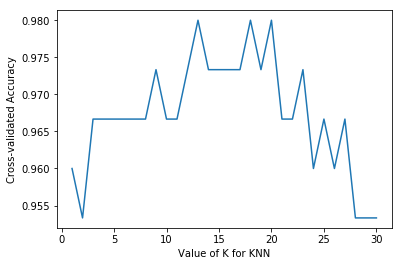

In [13]:
# plotting the values from above for better visualization
import matplotlib.pyplot as plt
% matplotlib inline

# x-axis -> K for KNN: cross-validation accuracy -> y-axis
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated Accuracy')

<B>Cross-validation Applications</B>
2. Model Selection